Table des matières

    Partie 1 - Récupération
    Partie 2 - Nettoyage 
    Partie 3 -Exploration (visualisation)
    Partie 4 - Modélisation
        Nous pouvons mesurer les performances du modèle grâce à la précision (accuracy) au recall et au score F1
    Partie 5 - Évaluation & Interprétation
    Partie 6 - Production

## 1     Partie 1 - Récupération

# import des bibliothèques

In [127]:
# Calcul
import numpy as np
import pandas as pd
from scipy import stats
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.imputation as imp
import statsmodels.stats as sms


# Graphique
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Algorithme
from scipy.stats import pearsonr, spearmanr, shapiro
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Régression linéaire:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# K-mean:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Options globales pour l'output display:
pd.options.display.float_format = "{:.3f}".format

# Import des donnees:

In [128]:
# Import des donnees:
Billet = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 10   Détectez des faux billets avec R ou Python\P10\BDD\\billets.csv", sep = ';',)              
Billet_prod = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 10   Détectez des faux billets avec R ou Python\P10\BDD\\billets_production.csv")
Billet_soutenance = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 10   Détectez des faux billets avec R ou Python\P10\BDD\\billets_test.csv")

In [129]:
Billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540
...,...,...,...,...,...,...,...
1495,False,171.750,104.380,104.170,4.420,3.090,111.280
1496,False,172.190,104.630,104.440,5.270,3.370,110.970
1497,False,171.800,104.010,104.120,5.510,3.360,111.950
1498,False,172.060,104.280,104.060,5.170,3.460,112.250


In [130]:
Billet_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.760,104.010,103.540,5.210,3.300,111.420,A_1
1,171.870,104.170,104.130,6.000,3.310,112.090,A_2
2,172.000,104.580,104.290,4.990,3.390,111.570,A_3
3,172.490,104.550,104.340,4.440,3.030,113.200,A_4
4,171.650,103.630,103.560,3.770,3.160,113.330,A_5


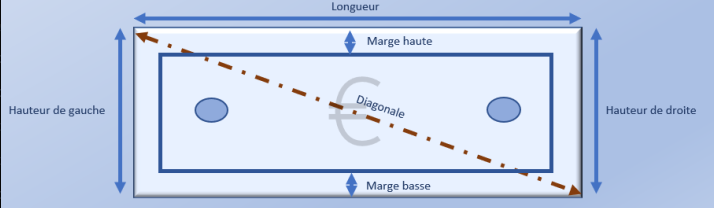

# Compter le nombre de billets 

In [131]:
# Utilisez value_counts() pour compter les occurrences de True et False dans la colonne "is_genuine"
counts = Billet["is_genuine"].value_counts()

# Affichez les résultats
print("Nombre de billets True :", counts[True])
print("Nombre de billets False :", counts[False])


Nombre de billets True : 1000
Nombre de billets False : 500


In [132]:
# Comptez les occurrences de True et False dans la colonne "is_genuine"
counts = Billet["is_genuine"].value_counts().reset_index()

# Renommez les colonnes pour Plotly Express
counts.columns = ["is_genuine", "count"]

# Créez le pie chart avec Plotly Express
fig = px.pie(counts, names="is_genuine", values="count", title="Répartition des billets par is_genuine")

# Affichez le pie chart
fig.show()


In [133]:
Billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000,1500.000,1500.000,1463.000,1500.000,1500.000
mean,171.958,104.030,103.920,4.486,3.151,112.678
std,0.305,0.299,0.326,0.664,0.232,0.873
min,171.040,103.140,102.820,2.980,2.270,109.490
25%,171.750,103.820,103.710,4.015,2.990,112.030
50%,171.960,104.040,103.920,4.310,3.140,112.960
75%,172.170,104.230,104.150,4.870,3.310,113.340
max,173.010,104.880,104.950,6.900,3.910,114.440


## Partie 2 - Nettoyage 

In [134]:
# Création d'un df_train (données complètes)
df_train = Billet.dropna()
df_train.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.810,104.860,104.950,4.520,2.890,112.830
1,True,171.460,103.360,103.660,3.770,2.990,113.090
2,True,172.690,104.480,103.500,4.400,2.940,113.160
3,True,171.360,103.910,103.940,3.620,3.010,113.510
4,True,171.730,104.280,103.460,4.040,3.480,112.540


In [135]:
# Création de DF Test (données manquantes)
df_test = Billet[Billet['margin_low'].isnull()]
df_test.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.940,103.890,103.450,NaN,3.250,112.790
99,True,171.930,104.070,104.180,NaN,3.140,113.080
151,True,172.070,103.800,104.380,NaN,3.020,112.930
197,True,171.450,103.660,103.800,NaN,3.620,113.270
241,True,171.830,104.140,104.060,NaN,3.020,112.360


In [136]:
df_test.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,37.000,37.000,37.000,0.000,37.000,37.000
mean,171.929,103.958,103.874,NaN,3.088,112.826
std,0.297,0.289,0.381,NaN,0.240,0.851
min,171.370,103.260,102.820,NaN,2.560,110.310
25%,171.800,103.720,103.620,NaN,2.990,112.410
50%,171.930,103.950,103.860,NaN,3.070,112.950
75%,172.070,104.150,104.120,NaN,3.230,113.350
max,172.660,104.490,104.660,NaN,3.620,114.440


## Partie 3 - Exploration

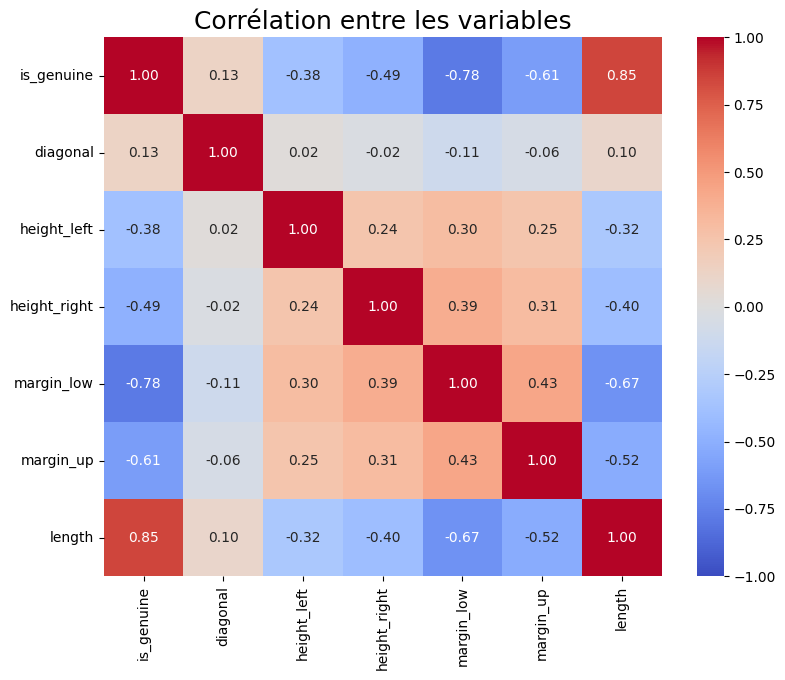

In [137]:
# Heatmap de la matrice de corrélation entre variables
plt.figure(figsize=(9, 7))
sns.heatmap(Billet.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Corrélation entre les variables", fontsize= 18)
plt.show()

Nous avons une corrélation positive entre les variables is_genuine et length, une une corrélation negative mais avec les variables is_genuine et margin_low

In [138]:
df_test.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.940,103.890,103.450,NaN,3.250,112.790
99,True,171.930,104.070,104.180,NaN,3.140,113.080
151,True,172.070,103.800,104.380,NaN,3.020,112.930
197,True,171.450,103.660,103.800,NaN,3.620,113.270
241,True,171.830,104.140,104.060,NaN,3.020,112.360


# eta square anova

x et y 

coefficients de test 'eta square' d'anova 
is genuine / length
is genuine / margin low
is genuine / margin up

In [139]:
# Sélection des données pour les variables X (is_genuine) et Y (length) à partir du DataFrame Billet
X = Billet["is_genuine"]
Y = Billet["length"]

# Fonction pour calculer le coefficient d'Eta carré entre deux variables X et Y
def eta_squared(x, y):
    # Calcul de la moyenne de la variable Y
    moyenne_y = y.mean()

    # Initialisation d'une liste pour stocker les informations par classe
    classes = []

    # Boucle sur les classes uniques de la variable X
    for classe in x.unique():
        # Extraction des valeurs de la variable Y correspondant à la classe actuelle
        yi_classe = y[x == classe]

        # Ajout des informations pour la classe actuelle à la liste des classes
        classes.append({"ni": len(yi_classe), "moyenne_classe": yi_classe.mean()})

    # Calcul de la somme totale des carrés (SCT)
    SCT = sum([(yj - moyenne_y) ** 2 for yj in y])

    # Calcul de la somme des carrés expliqués (SCE) en utilisant les informations de chaque classe
    SCE = sum([c["ni"] * (c["moyenne_classe"] - moyenne_y) ** 2 for c in classes])

    # Calcul et retour du coefficient d'Eta carré
    return SCE / SCT

# Appel de la fonction eta_squared avec les variables X et Y
eta_squared(X, Y)


0.7212843912211282

0.7213 indique une association relativement forte entre ces deux variables

In [140]:
X = Billet["is_genuine"]  
Y = Billet["margin_up"]  

eta_squared(X, Y)

0.36755392758315963

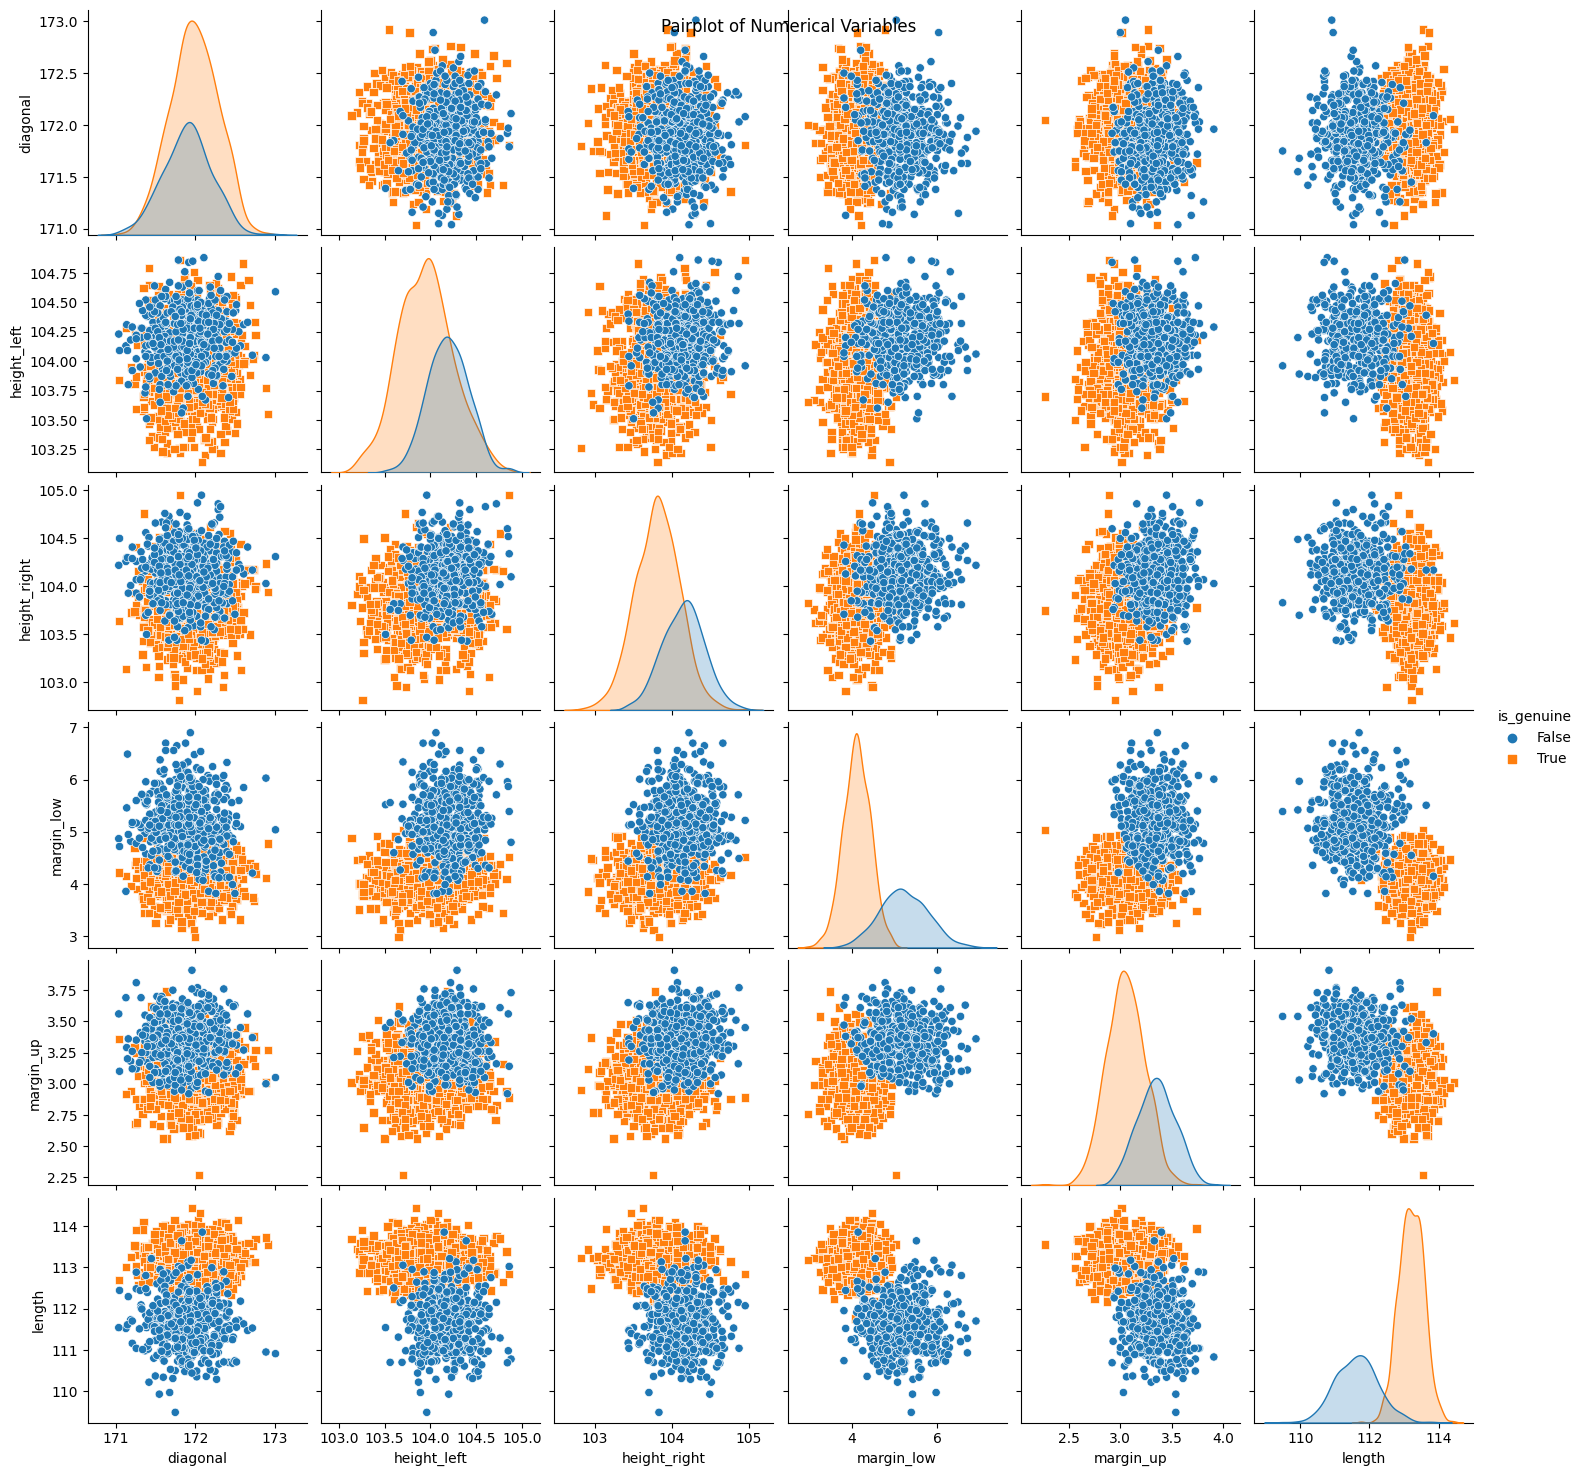

In [141]:
# Create a pairplot
sns.pairplot(Billet, hue="is_genuine", markers=["o", "s"])
plt.suptitle("Pairplot of Numerical Variables")
plt.show()

# savoir combien de margin low nul depuis le df brut (length)

In [142]:
# Comptez combien de valeurs nulles dans la colonne 'margin_low'
count_null_margin_low = (Billet['margin_low'].isnull()).sum()

# Affichez le résultat
print("Nombre de valeurs nulles dans la colonne 'margin_low':", count_null_margin_low)


Nombre de valeurs nulles dans la colonne 'margin_low': 37


# regression des moindres carrès margin low / is genuine / margin up 

In [143]:
# Supprimez les lignes avec des valeurs manquantes
data = df_train.dropna(subset=['margin_low', 'is_genuine', 'margin_up'])
data['is_genuine'] = data['is_genuine'].astype(int)

# Définissez vos variables explicatives (X) et votre variable cible (y)
X = data[['is_genuine', 'margin_up']]
y = data['margin_low']

# Créez un modèle de régression linéaire
model = sm.OLS(y, X)

# Ajustez le modèle aux données
results = model.fit()

# Affichez les résultats de la régression
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          5.431e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                        0.00
Time:                        14:19:29   Log-Likelihood:                         -1126.1
No. Observations:                1463   AIC:                                      2256.
Df Residuals:                    1461   BIC:                                      2267.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# résidus de la regression des moindres carrès

In [144]:
# Affichage des résidus de la régression linéaire
print("Résidus de la régression linéaire :")

# Accéder aux résidus à partir des résultats de la régression (assurez-vous que 'results' est défini ailleurs dans votre code)
residuals = results.resid

# Affichage des résidus
print(residuals)

# Les résidus représentent les écarts entre les valeurs observées et les valeurs prédites par le modèle de régression.
# Ils fournissent une indication de la qualité de l'ajustement du modèle aux données.
# Si les résidus sont petits et répartis de manière aléatoire, le modèle peut être considéré comme un bon ajustement.
# Cependant, des schémas systématiques dans les résidus peuvent indiquer des lacunes dans le modèle ou des violations des hypothèses de la régression linéaire.


Résidus de la régression linéaire :
0       0.654
1      -0.250
2       0.457
3      -0.431
4      -0.735
        ...  
1495   -0.341
1496    0.078
1497    0.333
1498   -0.161
1499   -0.562
Length: 1463, dtype: float64


In [145]:
# Affichage de la somme des carrés résiduels (SSR) à partir des résultats de la régression
print("Somme des carrés résiduels (SSR) :")

# Accéder à la SSR à partir des résultats de la régression (assurez-vous que 'results' est défini ailleurs dans votre code)
ssr = results.ssr

# Affichage de la SSR
print(ssr)

# La SSR représente la somme des carrés des résidus, c'est-à-dire la somme des carrés des différences entre les valeurs observées et les valeurs prédites par le modèle.
# Elle mesure la variabilité non expliquée par le modèle. Une SSR plus faible indique un meilleur ajustement du modèle aux données.

#Pour savoir si le SSR est bon il faut le comparer au R2 ou faire un Test de Breusch-Pagan 
#Si le test de Breusch-Pagan indique une hétéroscédasticité significative, 
# cela signifie que la variabilité des erreurs dans le modèle de régression n'est pas constante le long des valeurs prédites. 
# Cela peut indiquer que le modèle ne s'adapte pas uniformément à toutes les parties de vos données.



Somme des carrés résiduels (SSR) :
399.3185386193563


# histogramme des résidus

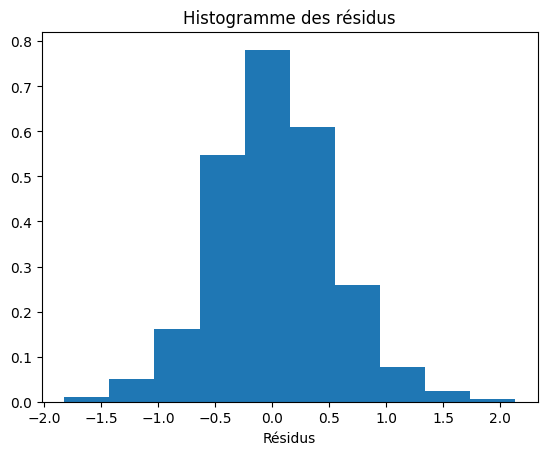

In [146]:
# Graphique:
plt.hist(results.resid, density=True)
plt.xlabel("Résidus")
plt.title("Histogramme des résidus")
plt.show()

# test de Breusch Pagan (pvalue inf O l'hypo est rejetée seuil de 5%)

In [147]:
# Spécifiez les variables exogènes supposées être responsables de l'hétéroscédasticité
exog_het = X  # Remplacez X par vos variables exogènes appropriées

# Effectuez le test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(results.resid, exog_het)
print("Test de Breusch-Pagan (LM):", bp_test[0])

# Formatez la p-value en tant que chaîne de caractères avec un format précis
formatted_p_value = "{:.1000f}".format(bp_test[1])

# Affichez la p-value formatée
print("P-value:", formatted_p_value)


Test de Breusch-Pagan (LM): 476.8685962137863
P-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010259701841579639250798360144082618604857764748320717191665288576776390179490520487175912925965396244259429330899882862325511167440434097762754698593300044955010612951526963378310823759811216224205898707522345308535718866455775162422194402568597415308559919061570653298076649662107229232788085937500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Test de Breusch-Pagan (LM) : La statistique du test est de 476.8685962137863. Cette statistique est calculée en comparant la somme des carrés des résidus estimés (comme dans un test d'homoscédasticité) avec une version de ces carrés pondérée par les variables explicatives du modèle. Une valeur élevée de cette statistique suggère une hétéroscédasticité significative.

P-value : La p-value est extrêmement faible (pratiquement égale à zéro), Cela signifie qu'il y a une preuve statistiquement significative que l'hypothèse nulle d'homoscédasticité est rejetée. En d'autres termes, il y a des preuves solides que la variance des résidus n'est pas constante et qu'elle varie en fonction des valeurs des variables explicatives.

En résumé, les résultats du test de Breusch-Pagan suggèrent fortement que l'hypothèse d'homoscédasticité n'est pas respectée dans votre modèle, ce qui peut avoir des implications sur l'interprétation des coefficients de régression et la fiabilité des tests d'inférence. Vous devriez envisager des techniques de régression robustes ou des modèles alternatifs pour tenir compte de cette hétéroscédasticité.

pvalue inf au seuil de 5% donc H0 (homoscédastique) donc nous avons l'hétéroscédastique

# tester la normalitée des résidus (test de shapiro)


# expliquer résultat shapiro

In [148]:
# Effectuez le test de normalité de Shapiro-Wilk
stat, p_value = shapiro(results.resid)

# Interprétez les résultats
alpha = 0.05  # Niveau de signification
print("P-valeur:", p_value)

if p_value > alpha:
    print("Les résidus suivent une distribution normale (l'hypothèse nulle n'est pas rejetée).")
else:
    print("Les résidus ne suivent pas une distribution normale (l'hypothèse nulle est rejetée).")


P-valeur: 0.004235017113387585
Les résidus ne suivent pas une distribution normale (l'hypothèse nulle est rejetée).


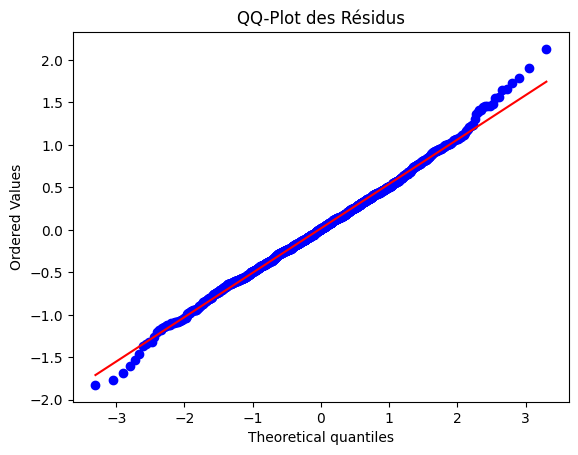

In [149]:
# Créez un QQ-plot des résidus avec un titre
fig, ax = plt.subplots()

# Utilisez stats.probplot pour générer le QQ-plot en comparant les résidus à une distribution normale
stats.probplot(results.resid, plot=ax)

# Réglez l'épaisseur des points
ax.get_lines()[0].set_markersize(6)

# Ajoutez un titre
ax.set_title("QQ-Plot des Résidus")

# Affiche le QQ-plot
plt.show()

# Un QQ-plot est utilisé pour évaluer la normalité des résidus d'un modèle statistique.
# Si les points suivent de près la ligne diagonale, cela suggère que les résidus suivent une distribution normale.
# Une déviation importante de la ligne diagonale peut indiquer une non-normalité des résidus.
# Cela aide à vérifier une des hypothèses fondamentales de la régression linéaire.


Certains points s'écartent de cette ligne aux extrémités, cela peut indiquer que la distribution n'est pas tout à fait normale aux queues. Cela peut signifier une légère asymétrie ou des queues plus épaisses que la distribution normale.

In [150]:
a_prevoir = Billet[["is_genuine", "margin_up"]]
Billet["margin_low_pred"] = results.predict(a_prevoir)

In [151]:
training_set_filled = Billet.copy()
training_set_filled["margin_low"] = Billet["margin_low"].fillna(value=Billet["margin_low_pred"])

## Partie 4 - Modélisation

Généralisation du modèle : sa capacité à effectuer des prédictions de qualité sur des situations jamais rencontrées

1ère étape : Création d'un jeu de données train et test

2ème étape : Centrage et réduction Normalisation des données (standard_scaler) standardization

3ème étape : Utilisation de la régression logistique de sk-learn pour prévoir les valeurs de is_genuine sur notre dataframe de test
D'abord avec les valeurs centrées réduites

4ème étape : Regardons le nombre de résultats erronés dans notre prédiction

5ème étape : Ensuite sans standardization 

6ème étape :Nous pouvons mesurer les performances du modèle grâce à la précision (accuracy) au recall et au score F1 

7ème étape :Matrice de confusion nous permettant d'évaluer les performances de la classification

1ère étape : Création d'un jeu de données train et test

In [152]:
# 1ère étape : Création d'un jeu de données train et test

# Divisez les données en ensembles d'entraînement et de test
training_set, test_set = train_test_split(training_set_filled, train_size=0.8, stratify=training_set_filled["is_genuine"])

feature_cols = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]
X_train = training_set[feature_cols]
y_train = training_set.is_genuine

X_test = test_set[feature_cols]
y_test = test_set.is_genuine

Ce code divise l'ensemble de données en ensembles d'entraînement et de test, sélectionne les caractéristiques pertinentes, puis crée les ensembles de données d'entraînement et de test pour être utilisés dans un modèle d'apprentissage automatique de classification.

2ème étape : Centrage et réduction Normalisation des données (standard_scaler) standardization

In [153]:
# centrage et réduction training
X_train_val = training_set[feature_cols].values
std_scale = preprocessing.StandardScaler().fit(X_train_val)
X_train_scaled = std_scale.transform(X_train_val)

# centrage et réduction test
X_test_val  = test_set[feature_cols].values
std_scale = preprocessing.StandardScaler().fit(X_test_val)
X_test_scaled = std_scale.transform(X_test_val)

Ce code effectue la standardisation (centrage et réduction) des données d'entraînement (X_train) et des données de test (X_test) en utilisant le StandardScaler de scikit-learn. Cela permet de mettre à l'échelle les caractéristiques de manière à ce qu'elles aient une moyenne de zéro et un écart type de un, ce qui est couramment utilisé dans de nombreux algorithmes d'apprentissage automatique pour garantir que les caractéristiques aient des échelles comparables et éviter tout biais dû à des différences d'échelle.

3ème étape : Utilisation de la régression logistique de sk-learn pour prévoir les valeurs de is_genuine sur notre dataframe de test
D'abord avec les valeurs centrées réduites

In [154]:
scaled_train_df = pd.DataFrame(X_train_scaled, columns=feature_cols)
scaled_test_df = pd.DataFrame(X_test_scaled, columns=feature_cols)
logReg = linear_model.LogisticRegression(random_state=10).fit(scaled_train_df, y_train)

a_prevoir = scaled_test_df[feature_cols]
y_pred = logReg.predict(a_prevoir)
test_set["is_genuine_predicted_scaled_lg"] = y_pred

Ce code crée des DataFrames pour stocker les données d'entraînement et de test standardisées, puis utilise un modèle de régression logistique pour prédire la variable "is_genuine" à partir des caractéristiques standardisées de l'ensemble de test. Les prédictions sont ensuite ajoutées au DataFrame de l'ensemble de test sous le nom "is_genuine_predicted_scaled_lg".

4ème étape : Regardons le nombre de résultats erronés dans notre prédiction


In [155]:
test_set.loc[test_set["is_genuine"] != test_set["is_genuine_predicted_scaled_lg"]]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_pred,is_genuine_predicted_scaled_lg
1025,False,172.170,104.200,104.130,3.860,3.380,112.440,5.208,True


Cette ligne de code extrait les lignes du DataFrame test_set pour lesquelles la valeur réelle de la variable "is_genuine" diffère de la valeur prédite par le modèle de régression logistique, qui a été calculée et stockée dans la colonne "is_genuine_predicted_scaled_lg". En d'autres termes, cette ligne identifie les exemples où le modèle a fait des erreurs de prédiction par rapport aux valeurs réelles de "is_genuine".

In [156]:
# Comparaison entre les valeurs prédites et les valeurs réelles
errors = (y_pred != y_test)

# Comptez le nombre d'erreurs
num_errors = errors.sum()

# Affichez le nombre d'erreurs
print("Nombre de résultats erronés:", num_errors)

Nombre de résultats erronés: 1


In [157]:
print("Accuracy:", accuracy_score(y_test, test_set["is_genuine_predicted_scaled_lg"]))

Accuracy: 0.9966666666666667



Ce code évalue la performance d'un modèle de régression logistique en comptant le nombre d'erreurs de prédiction par rapport aux valeurs réelles de l'ensemble de test, puis affiche ce nombre d'erreurs.

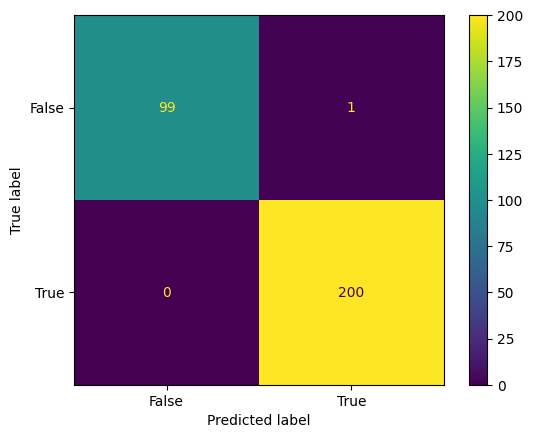

In [158]:
# standardized 
ConfusionMatrixDisplay.from_predictions(
   y_test, test_set["is_genuine_predicted_scaled_lg"])

plt.show()

5ème étape : Ensuite sans standardization 

In [159]:
# Création d'un modèle de régression logistique et entraînement du modèle sur l'ensemble d'entraînement
logReg = linear_model.LogisticRegression(random_state=10).fit(X_train, y_train)

# Sélection des caractéristiques à prévoir à partir de l'ensemble de test
a_prevoir = test_set[feature_cols]

# Prédiction des étiquettes de classification pour l'ensemble de test
y_pred = logReg.predict(a_prevoir)

# Ajout des prédictions au DataFrame original test_set dans une nouvelle colonne
test_set["is_genuine_predicted_lg"] = y_pred

# Le modèle logReg a été entraîné sur l'ensemble d'entraînement et utilisé pour prédire les étiquettes de classification
# pour l'ensemble de test à l'aide des caractéristiques spécifiées dans feature_cols.
# Les prédictions sont ensuite ajoutées au DataFrame test_set dans une nouvelle colonne "is_genuine_predicted_lg".


In [160]:
# Comparaison entre les valeurs prédites et les valeurs réelles
errors = (y_pred != y_test)

# Comptez le nombre d'erreurs
num_errors = errors.sum()

# Affichez le nombre d'erreurs
print("Nombre de résultats erronés:", num_errors)


Nombre de résultats erronés: 1


Ce code entraîne un modèle de régression logistique sur les données d'entraînement, utilise ce modèle pour prédire la variable "is_genuine" pour l'ensemble de test, puis ajoute ces prédictions au DataFrame de l'ensemble de test sous le nom "is_genuine_predicted_lg".

In [161]:
test_set.loc[test_set["is_genuine"] != test_set["is_genuine_predicted_scaled_lg"]]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_pred,is_genuine_predicted_scaled_lg,is_genuine_predicted_lg
1025,False,172.170,104.200,104.130,3.860,3.380,112.440,5.208,True,True


Cette ligne de code identifie les exemples dans l'ensemble de test pour lesquels la valeur réelle de la variable "is_genuine" diffère de manière significative de la valeur prédite par le modèle de régression logistique qui a été calculée précédemment et stockée dans la colonne "is_genuine_predicted_scaled_lg".

In [162]:
classification_report(test_set["is_genuine"], test_set["is_genuine_predicted_lg"])

'              precision    recall  f1-score   support\n\n       False       1.00      0.99      0.99       100\n        True       1.00      1.00      1.00       200\n\n    accuracy                           1.00       300\n   macro avg       1.00      0.99      1.00       300\nweighted avg       1.00      1.00      1.00       300\n'

In [163]:
print("Accuracy:", accuracy_score(y_test, test_set["is_genuine_predicted_lg"]))

Accuracy: 0.9966666666666667


7ème étape :Matrice de confusion nous permettant d'évaluer les performances de la classification

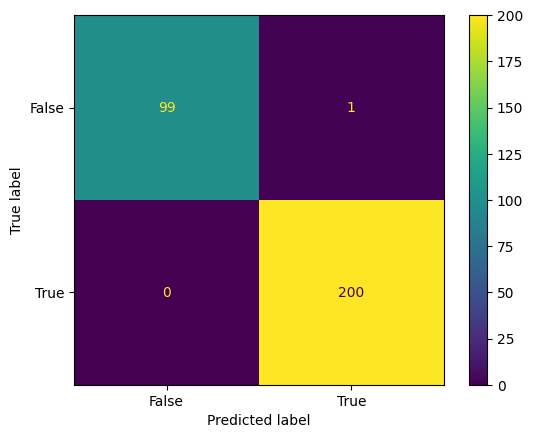

In [164]:
# non standardized 
ConfusionMatrixDisplay.from_predictions(
   y_test, test_set["is_genuine_predicted_lg"])

plt.show()

    Partie 5 - Évaluation & Interprétation


K-Means (méthode non supervisée)

K-means est une méthode non supervisée donc le nombre de clusters peut être supérieur à 2. Mais dans le cadre de ce projet on veut juste savoir si les billets sont VRAI ou FAUX donc on va définir 2 clusters. La méthode supervisé KNN aurait sans doute été plus pertinente (vu qu'en plus volumétrie pas trop importante) ou random forest (pour limiter sur-apprentissage).

le processus de K-means fonctionne comme suit :

Initialisation : Les centroïdes sont initialement placés au hasard dans l'espace des données ou sélectionnés de manière stratégique.

Affectation des points au cluster : Pour chaque point dans l'ensemble de données, on attribue le point au cluster dont le centroïde est le plus proche (en termes de distance euclidienne).

Mise à jour des centroïdes : Une fois que tous les points ont été attribués à des clusters, les centroïdes sont mis à jour. Chaque centroïde est déplacé vers le centre (moyenne) de son groupe de points associé.

Répétition : Les étapes 2 et 3 sont répétées itérativement jusqu'à ce que les centroïdes convergent vers des positions stables ou que certains critères d'arrêt soient atteints.

Les positions finales des centroïdes représentent les centres finaux des clusters obtenus par l'algorithme K-means. Ces centres sont utilisés pour représenter de manière concise chaque cluster formé par l'algorithme.

In [165]:
df_train.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [166]:
# Import des bibliothèques nécessaires
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Ici, nous importons les bibliothèques nécessaires. KMeans pour effectuer le clustering, PCA pour l'analyse en composantes principales

méthode pour dénir le nombre de cluster 

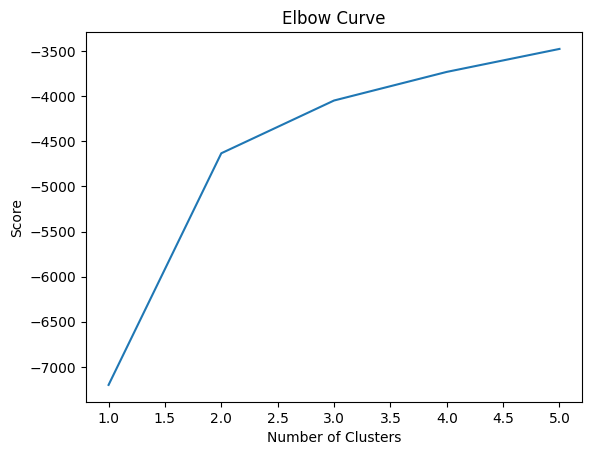

In [167]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 6
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10, random_state=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_train_scaled).score(X_train_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

regarder le nombre de coudes pour déterminer le nombre de cluster 

In [168]:
# Nombre de clusters:
n_clust = 2

Nous définissons le nombre de clusters (groupes) que nous souhaitons obtenir à l'aide de l'algorithme K-means. Ici, nous avons choisi d'avoir 2 clusters.pour is_genuine true et false

In [169]:
# Utilisez values pour obtenir un tableau de valeurs sans noms de colonnes
x_train_values = test_set[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]].values

Nous extrayons les valeurs des colonnes pertinentes du dataframe df_train et les stockons dans la variable x_train_values. Cela garantit que nous travaillons avec un tableau de valeurs plutôt qu'avec un dataframe contenant des noms de colonnes.

In [170]:
# Clustering par K-means:
km = KMeans(n_clusters=n_clust, random_state=1994)
x_km = km.fit_transform(x_train_values)

Nous créons une instance de l'algorithme K-means avec le nombre de clusters spécifié, puis nous l'ajustons aux données (x_train_values). La méthode fit_transform renvoie les distances des points aux centres de cluster.

In [171]:
# Ajout d'une colonne contenant le cluster attribué:
clusters_km = km.labels_

Nous récupérons les étiquettes de cluster attribuées à chaque point après l'ajustement du modèle K-means et les stockons dans la variable clusters_km

In [172]:
# Récupération des coordonnées des centroids
centroids_km = km.cluster_centers_

Nous récupérons les coordonnées des centroïdes de chaque cluster après l'ajustement du modèle K-means et les stockons dans la variable centroids_km.

In [173]:
# Clustering par projection des individus sur le premier plan factoriel:
pca_km = PCA(n_components=3).fit(x_train_values)
acp_km = pca_km.transform(x_train_values)

Nous effectuons une Analyse en Composantes Principales (PCA) sur les données. Cela réduit la dimension des données à 3 composantes principales.

L'Analyse en Composantes Principales (PCA) est une technique d'analyse statistique qui vise à transformer un ensemble de données contenant des variables potentiellement corrélées en un nouvel ensemble de variables non corrélées, appelées composantes principales. L'objectif de la PCA est de réduire la dimensionnalité des données tout en préservant au mieux leur structure ou leur dispersion.

In [174]:
centroids_km_projected = pca_km.transform(centroids_km)

Nous projetons les coordonnées des centroïdes sur les composantes principales obtenues à partir de la PCA.

la projection des centroïdes sur les composantes principales permet de voir où se situent les centroïdes dans l'espace transformé par la PCA. Cela peut être utile pour interpréter visuellement la distribution des clusters dans cet espace réduit.

sortir la precision du modele kmean 

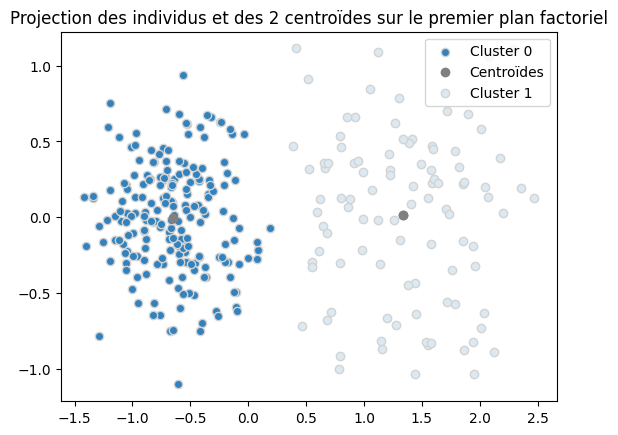

In [175]:
# Graphique:
for couleur, k in zip(["#3182bd", "#dbe9f3"], [0, 1]):
    plt.scatter(acp_km[clusters_km == k, 0], acp_km[clusters_km == k, 1], c=couleur, edgecolors="#D3D3D3", label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_km_projected[:, 0], centroids_km_projected[:, 1], color="grey", label="Centroïdes")

plt.title("Projection des individus et des {} centroïdes sur le premier plan factoriel".format(len(centroids_km)))
plt.show()

Nous créons un graphique pour visualiser les clusters dans le premier plan factoriel obtenu à partir de la PCA. Les points des individus sont colorés en fonction de leur cluster, et les centroïdes sont marqués en gris.

In [176]:
# Convertir le tableau clusters_km en une série pandas
clusters_series = pd.Series(clusters_km)

# Afficher le décompte des valeurs
value_counts = clusters_series.value_counts()

# Afficher le nombre de valeurs pour chaque cluster
print(value_counts)

0    202
1     98
dtype: int64


In [177]:
# Vérification de la classification: Matrice de confusion
km_matrix = pd.crosstab(clusters_km, test_set["is_genuine"])
print(km_matrix)

# La matrice de confusion est une table qui compare les vraies étiquettes (True) avec les prédictions (Predicted).
# Dans votre cas, les valeurs '0' et '1' correspondent aux classes que le modèle a essayé de prédire (probablement 'False' et 'True').
# Les éléments de la matrice représentent le nombre d'observations dans chaque catégorie.
# Par exemple, la valeur 5 dans la cellule (0, 'False') indique qu'il y a 5 observations réelles de la classe 'False' prédites correctement,
# tandis que la valeur 200 dans la cellule (0, 'True') indique qu'il y a eu 200 observations réelles de la classe 'True' prédites comme 'False'.
# La diagonale principale (de 'False' à 'False' et de 'True' à 'True') représente les prédictions correctes.

is_genuine  False  True 
row_0                   
0               2    200
1              98      0


In [178]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Calcul de l'indice de silhouette
silhouette_avg = silhouette_score(test_set, clusters_km)
print("L'indice de silhouette moyen est :", silhouette_avg)

# Calcul de l'indice de silhouette pour chaque point individuel
sample_silhouette_values = silhouette_samples(test_set, clusters_km)

# Ajout des indices de silhouette à votre DataFrame
test_set["silhouette"] = sample_silhouette_values

# Affichage des indices de silhouette pour chaque point
print("Indices de silhouette pour chaque point :\n", test_set[["silhouette"]])

# L'indice de silhouette mesure à quel point chaque objet dans un cluster est similaire aux autres objets du même cluster
# par rapport aux objets des autres clusters. Il varie de -1 à 1, où une valeur élevée indique une bonne séparation entre les clusters.apr_s 

L'indice de silhouette moyen est : 0.6184798879616471
Indices de silhouette pour chaque point :
       silhouette
645        0.677
309        0.653
8          0.629
1317       0.544
762        0.616
...          ...
86         0.672
57         0.701
1374       0.635
48         0.529
788        0.637

[300 rows x 1 columns]


Une valeur de 0.61 suggère une séparation relativement bien définie entre les clusters,
indiquant une bonne qualité de la structure des clusters dans votre modèle de clustering.

Plus précisément, une valeur positive indique que les objets à l'intérieur du même cluster sont plus similaires entre eux
qu'avec ceux d'autres clusters, tandis qu'une valeur proche de 0 suggère des chevauchements entre les clusters.
Une valeur négative indiquerait que les objets sont mal classés dans les clusters.

Cet indice est un outil utile pour évaluer la qualité intrinsèque des clusters formés par un algorithme de clustering.

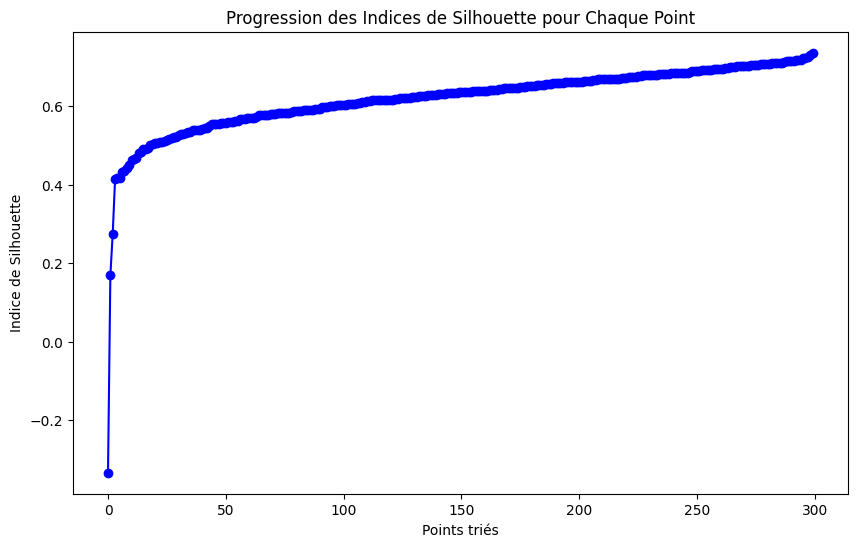

In [179]:
# Tri des indices de silhouette
sorted_silhouette = test_set.sort_values(by='silhouette')['silhouette'].values

# Tracer la progression des indices de silhouette
plt.figure(figsize=(10, 6))
plt.plot(sorted_silhouette, marker='o', linestyle='-', color='b')
plt.title('Progression des Indices de Silhouette pour Chaque Point')
plt.xlabel('Points triés')
plt.ylabel('Indice de Silhouette')
plt.show()


la tendance globale est à l'amélioration, cela pourrait indiquer que le modèle K-means a progressivement ajusté les clusters de manière plus cohérente

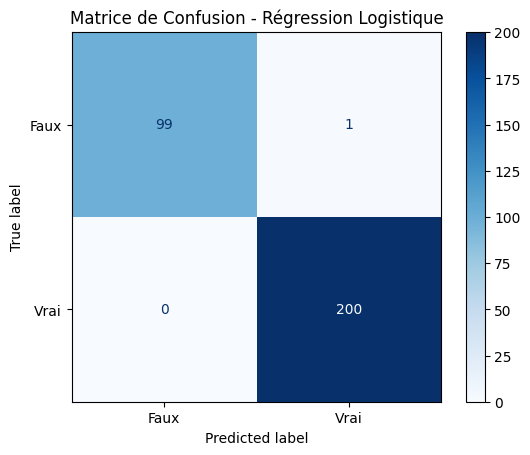

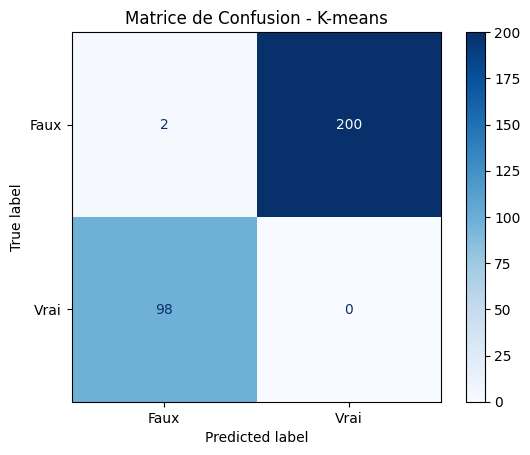

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion pour la régression logistique
conf_matrix_log = confusion_matrix(y_test, test_set["is_genuine_predicted_scaled_lg"])

# Affichage de la matrice de confusion pour la régression logistique
disp_log = ConfusionMatrixDisplay(conf_matrix_log, display_labels=["Faux", "Vrai"])
disp_log.plot(cmap='Blues', values_format="d")  # Utiliser values_format="d" pour afficher des nombres entiers
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()

# Supposons que km_matrix contient la matrice de confusion pour le modèle K-means
conf_matrix_kmeans = confusion_matrix(clusters_km, test_set["is_genuine"])

# Affichage de la matrice de confusion pour le modèle K-means
disp_kmeans = ConfusionMatrixDisplay(conf_matrix_kmeans, display_labels=["Faux", "Vrai"])
disp_kmeans.plot(cmap='Blues', values_format="d")  # Utiliser values_format="d" pour afficher des nombres entiers
plt.title("Matrice de Confusion - K-means")
plt.show()


Évaluation & Interprétation

La régression logistique a tendance a donner de meilleurs résultats, après plusieurs essais nous obtenons 1 à 6 erreurs et de 3 à 6 erreurs avec K-moyennes.

Essayons maintenant nos modèles sur les billets de production à analyser.

    Partie 6 - Production

In [181]:
X_prod = Billet_prod[feature_cols].values
# centrage et réduction production
std_scale = preprocessing.StandardScaler().fit(X_prod)
X_prod_scaled = std_scale.transform(X_prod)

In [182]:
Billet_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.760,104.010,103.540,5.210,3.300,111.420,A_1
1,171.870,104.170,104.130,6.000,3.310,112.090,A_2
2,172.000,104.580,104.290,4.990,3.390,111.570,A_3
3,172.490,104.550,104.340,4.440,3.030,113.200,A_4
4,171.650,103.630,103.560,3.770,3.160,113.330,A_5


In [183]:
from sklearn.cluster import KMeans

# Création d'un objet KMeans avec 2 clusters et une initialisation aléatoire pour la reproductibilité
kmeans = KMeans(n_clusters=2, random_state=10)

# Prédiction des clusters pour les données de production X_prod_scaled
clusters = kmeans.fit_predict(X_prod_scaled)

# Une autre façon de prédire les clusters pour les données de production X_prod_scaled
# clusters = kmeans.predict(X_prod_scaled)

# Ajout du numéro du cluster à la colonne "kmeans" du DataFrame original Billet_prod
Billet_prod["kmeans"] = clusters

# Sélection des caractéristiques à prévoir à l'aide du modèle de régression logistique
a_prevoir = Billet_prod[feature_cols]

# Prédiction à l'aide du modèle de régression logistique sur les caractéristiques sélectionnées
y_pred_prod = logReg.predict(a_prevoir)

# Ajout des prédictions du modèle de régression logistique à la colonne "logRegPred" du DataFrame Billet_prod
Billet_prod["logRegPred"] = y_pred_prod

In [184]:
Billet_prod.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id,kmeans,logRegPred
0,171.760,104.010,103.540,5.210,3.300,111.420,A_1,0,False
1,171.870,104.170,104.130,6.000,3.310,112.090,A_2,0,False
2,172.000,104.580,104.290,4.990,3.390,111.570,A_3,0,False
3,172.490,104.550,104.340,4.440,3.030,113.200,A_4,1,True
4,171.650,103.630,103.560,3.770,3.160,113.330,A_5,0,True


Création d'une esquisse d'utilisation

In [185]:
# Fonction pour apprendre un modèle de régression logistique sans données manquantes
def learnLogReg(ld: pd.DataFrame, feature_cols: list[str], y: str):

    # Extraction de la variable cible (y)
    y_train = ld[y]

    # Extraction des caractéristiques à partir du DataFrame
    X_train_val = ld[feature_cols].values

    # Centrage et réduction des données d'entraînement
    std_scale = preprocessing.StandardScaler().fit(X_train_val)
    X_train_scaled = std_scale.transform(X_train_val)

    # Création d'un DataFrame pour les données d'entraînement centrées et réduites
    scaled_train_df = pd.DataFrame(X_train_scaled, columns=feature_cols)

    # Retourne le modèle de régression logistique entraîné
    return linear_model.LogisticRegression(random_state=10).fit(scaled_train_df, y_train)

# Fonction pour effectuer des prédictions à l'aide d'un modèle de régression logistique
def predictLogReg(logReg, data, feature_cols):

    # Copie des données pour éviter de modifier les données d'origine
    uData = data[feature_cols].copy()
    feature_cols = uData.columns

    # Centrage et réduction des données de production
    X_train_val = uData[feature_cols].values
    std_scale = preprocessing.StandardScaler().fit(X_train_val)
    X_test_scaled = std_scale.transform(X_train_val)

    # Création d'un DataFrame pour les données de production centrées et réduites
    scaled_test_df = pd.DataFrame(X_test_scaled, columns=feature_cols)

    # Sélection des caractéristiques à prédire
    to_predict = scaled_test_df[feature_cols]

    # Prédiction des valeurs cibles
    y_pred = logReg.predict(to_predict)

    # Prédiction des probabilités associées à chaque classe
    y_pred_proba = logReg.predict_proba(to_predict)

    # Ajout de la prédiction au DataFrame original
    uData["prediction"] = y_pred

    # Création d'un DataFrame pour stocker les probabilités de prédiction
    pP = pd.DataFrame(y_pred_proba)

    # Calcul de la probabilité maximale pour chaque ligne et conversion en pourcentage
    uData["prediction_probability"] = pP[[0, 1]].max(axis=1) * 100
    uData["prediction_probability"] = uData["prediction_probability"].astype(int)
    uData["prediction_probability"] = uData["prediction_probability"].astype(str)
    uData["prediction_probability"] = uData["prediction_probability"] + "%"

    # Retourne le DataFrame avec les prédictions
    return uData


In [186]:
# Entraînement d'un modèle de régression logistique sur un ensemble de données d'entraînement
logReg = learnLogReg(
    training_set_filled,  # Le DataFrame d'entraînement
    ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"],  # Les caractéristiques à utiliser
    "is_genuine"  # La variable cible que le modèle doit prédire
)

# L'objet logReg contient maintenant le modèle de régression logistique entraîné
# Vous pouvez l'utiliser pour faire des prédictions sur de nouvelles données
# en utilisant la fonction predictLogReg que vous avez définie précédemment

In [187]:
from sklearn.preprocessing import LabelEncoder

# Création d'un objet LabelEncoder
label_encoder = LabelEncoder()

# Application du LabelEncoder sur la colonne 'id' du DataFrame Billet_prod
Billet_prod['id'] = label_encoder.fit_transform(Billet_prod['id'])

# La colonne 'id' maintenant contient des valeurs numériques représentant les catégories d'origine
# Ces valeurs numériques sont générées par le LabelEncoder, transformant les catégories en entiers
# Vous pouvez utiliser l'objet label_encoder pour inverser cette transformation si nécessaire

In [188]:
# Appel de la fonction predictLogReg avec le modèle entraîné (logReg), les données de production (Billet_prod)
# et les caractéristiques à utiliser pour la prédiction (feature_cols)
predicted_data = predictLogReg(logReg, Billet_prod, feature_cols)

# Le DataFrame predicted_data maintenant contient les prédictions et les probabilités associées
# Vous pouvez examiner les résultats pour chaque ligne du DataFrame pour voir les prédictions et les probabilités
# La colonne "prediction" contient les prédictions, et "prediction_probability" contient les probabilités en pourcentage
predicted_data


,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,prediction_probability
0,171.760,104.010,103.540,5.210,3.300,111.420,False,96%
1,171.870,104.170,104.130,6.000,3.310,112.090,False,98%
2,172.000,104.580,104.290,4.990,3.390,111.570,False,99%
3,172.490,104.550,104.340,4.440,3.030,113.200,True,99%
4,171.650,103.630,103.560,3.770,3.160,113.330,True,99%


Soutenance 

In [189]:
predicted_data_soutenance = predictLogReg(logReg,Billet_soutenance, feature_cols)

predicted_data_soutenance

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,prediction_probability
0,172.090,103.950,103.730,4.390,3.090,113.190,True,99%
1,171.520,104.170,104.030,5.270,3.160,111.820,False,92%
2,171.780,103.800,103.750,3.810,3.240,113.390,True,99%
3,172.020,104.080,103.990,5.570,3.300,111.100,False,99%
4,171.790,104.340,104.370,5.000,3.070,111.870,False,68%


méthode de normalisation 
comparer les algorithmes entre eux 

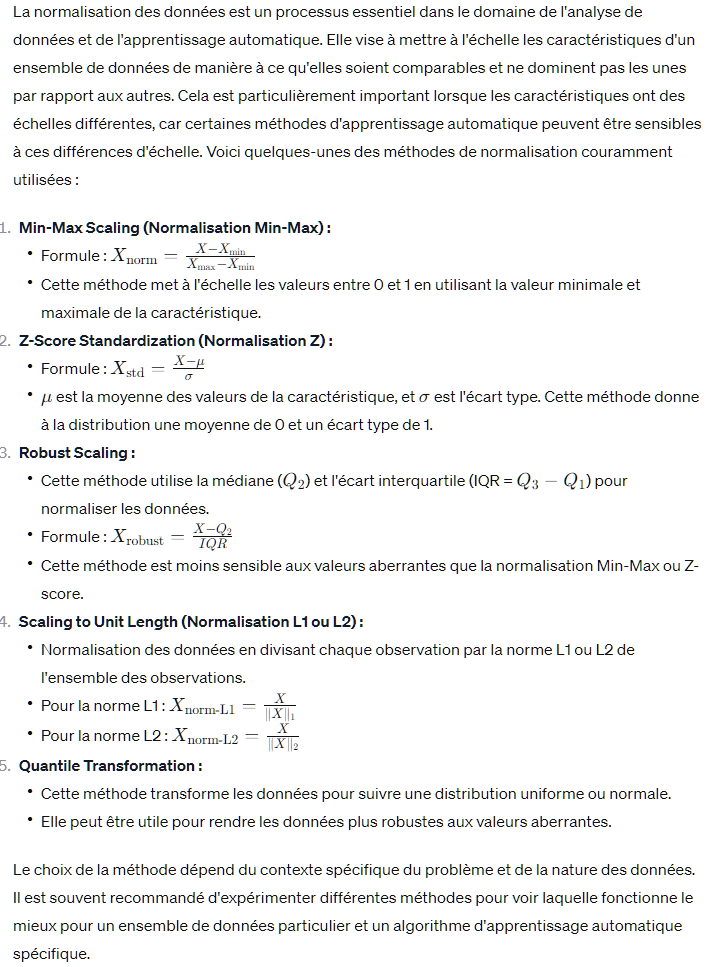